In [1]:
pip install tensorflow==1.15 tqdm opencv-python tflearn matplotlib

Looking in indexes: https://pypi.org/simple, https://repos.apixio.com/nexus/repository/apixio-pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [15]:
from tqdm import tqdm 
import os
import numpy as np
from random import shuffle
import cv2

#Pass in your directory where you downloaded train and test data
TRAIN_DIR ='./dogs-vs-cats/train'
TEST_DIR ='test'
IMG_SIZE = 50
LEARNING_RATE = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LEARNING_RATE, '2conv-basic')

In [3]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]

In [50]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
def create_train_data():
    if(os.path.exists('./train_data.npy')):
        np_load_old = np.load
        np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
        result = np.load('./train_data.npy')
        np.load = np_load_old
        return result
    
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)    
    np.save('./train_data.npy', training_data)
    return training_data

def process_test_data():
    if(os.path.exists('test_data.npy')):
        np_load_old = np.load
        np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
        result = np.load('test_data.npy')
        np.load = np_load_old
        return result
    
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    np.save('./test_data.npy', testing_data)
    return testing_data

In [5]:
train_data = create_train_data()
#train_data = np.load('./train_data.npy')

In [6]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LEARNING_RATE, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')




Scipy not supported!





Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
keep_dims is deprecated, use keepdims instead





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







In [7]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')


train = train_data[:-500]
test = train_data[-500:]

In [8]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [9]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 11.39122 | time: 49.386s
| Adam | epoch: 003 | loss: 11.39122 - acc: 0.5053 -- iter: 24448/24500
Training Step: 1149  | total loss: 11.25947 | time: 50.517s
| Adam | epoch: 003 | loss: 11.25947 - acc: 0.5110 | val_loss: 11.69713 - val_acc: 0.4920 -- iter: 24500/24500
--


In [10]:
import tensorflow as tf
tf.reset_default_graph()

In [11]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

IMG_SIZE=50

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LEARNING_RATE, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1148  | total loss: 0.49311 | time: 34.795s
| Adam | epoch: 003 | loss: 0.49311 - acc: 0.7589 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.49965 | time: 35.884s
| Adam | epoch: 003 | loss: 0.49965 - acc: 0.7502 | val_loss: 0.51147 - val_acc: 0.7380 -- iter: 24500/24500
--


In [12]:
import tensorflow as tf
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LEARNING_RATE, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



if os.path.exists('C:/Users/H/Desktop/KaggleDogsvsCats/{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

train = train_data[:-500]
test = train_data[-500:]

X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

model.save(MODEL_NAME)


Training Step: 3829  | total loss: 0.34461 | time: 34.654s
| Adam | epoch: 010 | loss: 0.34461 - acc: 0.8545 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.35172 | time: 35.746s
| Adam | epoch: 010 | loss: 0.35172 - acc: 0.8550 | val_loss: 0.46873 - val_acc: 0.8140 -- iter: 24500/24500
--
INFO:tensorflow:/Users/ilalith/Desktop/trainset/metriks/examples/dogs-vs-cats/dogsvscats-0.001-2conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


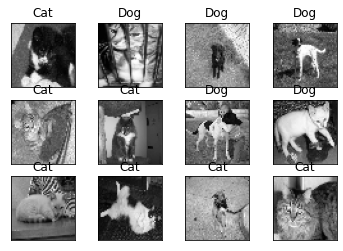

In [51]:
import matplotlib.pyplot as plt

# if you need to create the data:
test_data = process_test_data()
# if you already have some saved:

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [66]:
import metriks
y_prob=[]
y_labels=[]
for data in tqdm(test_data):
    img_num = data[1]
    img_data = data[0]
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict([data])[0]
    y_arr=[]
    if np.argmax(model_out) == 1: y_arr.append([1, 0])
    else: y_arr.append([0,1])
    y_labels.extend(y_arr)
    
    y_prob.append(model_out)
y_true=np.array(y_labels)
y_prob=np.array(y_prob)
y_prob=np.array(y_prob)
result = metriks.recall_at_k(y_true, y_prob, 2)
print(result)

100%|██████████| 12500/12500 [00:15<00:00, 800.99it/s]


1.0


In [70]:
import metriks
y_prob=[]
y_labels=[]
for data in tqdm(test):
    print(data)
    img_num = data[1]
    img_data = data[0]
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict([data])[0]
    y_arr=[]
    y_arr.append(img_num)
    y_labels.extend(y_arr)
    
    y_prob.append(model_out)
y_true=np.array(y_labels)
y_prob=np.array(y_prob)
y_prob=np.array(y_prob)
result = metriks.recall_at_k(y_true, y_prob, 2)
print(result)

 10%|█         | 50/500 [00:00<00:00, 496.17it/s]

[array([[42, 41, 41, ..., 15, 34, 40],
       [41, 40, 39, ..., 17, 23, 34],
       [42, 42, 40, ..., 28, 24, 31],
       ...,
       [32, 35, 35, ..., 23, 20, 23],
       [27, 30, 27, ..., 29, 24, 21],
       [36, 32, 32, ..., 20, 33, 20]], dtype=uint8)
 array([1, 0])]
[array([[177, 217, 222, ...,  65,  65,  51],
       [213, 215, 200, ...,  51,  37,  51],
       [203, 205, 202, ...,  66,  64,  57],
       ...,
       [161, 152, 166, ..., 108, 141, 147],
       [158, 141, 155, ..., 148, 141, 162],
       [142, 148, 148, ..., 133, 157, 162]], dtype=uint8)
 array([1, 0])]
[array([[ 19,  17,  12, ..., 175,  93, 100],
       [ 20,  17,  14, ..., 185,  98, 105],
       [ 20,  16,  14, ..., 255, 104, 101],
       ...,
       [111, 107, 136, ..., 184, 219, 219],
       [108, 116, 135, ..., 143, 218, 218],
       [116, 121, 127, ..., 147, 215, 216]], dtype=uint8)
 array([0, 1])]
[array([[  2,   4,   7, ..., 100,  84,  76],
       [  5,   4,   6, ...,  86,  91,  79],
       [  7,   8,   8, ...

 31%|███       | 154/500 [00:00<00:00, 502.42it/s]

[array([[ 69,  46,  84, ...,  29,  25,  22],
       [ 72,  56,  87, ...,  30,  25,  26],
       [ 72,  65,  88, ...,  30,  30,  27],
       ...,
       [117, 123,  72, ...,  90,  85,  64],
       [ 69,  63,  65, ...,  97,  88,  64],
       [ 55,  44,  53, ...,  73,  80,  42]], dtype=uint8)
 array([1, 0])]
[array([[192, 192, 192, ..., 192, 192, 192],
       [192, 192, 192, ..., 192, 192, 192],
       [170, 200, 203, ..., 202, 214, 178],
       ...,
       [194,  32,   7, ..., 165, 190, 209],
       [192, 192, 192, ..., 192, 192, 192],
       [192, 192, 192, ..., 192, 192, 192]], dtype=uint8)
 array([1, 0])]
[array([[ 15,  11,   8, ..., 113,  88, 103],
       [  9,  10,   8, ...,  88, 115, 110],
       [ 20,  17,  21, ..., 110,  79, 124],
       ...,
       [ 41,  63,  49, ...,  20,  23,  23],
       [  7,   6,  12, ...,   7,  22,  13],
       [ 24,  24,   7, ...,  21,  26,   8]], dtype=uint8)
 array([1, 0])]
[array([[ 84,  94,  85, ..., 182, 182, 183],
       [ 92,  93,  91, ..., 182, 1

 61%|██████▏   | 307/500 [00:00<00:00, 507.02it/s]

[array([[179, 128, 163, ..., 224, 231, 204],
       [176, 103, 152, ..., 228, 202, 221],
       [197, 224, 225, ..., 200, 229, 209],
       ...,
       [199, 200, 193, ...,  25,  21,  37],
       [203, 202, 185, ...,  24,  19,  28],
       [171, 212, 200, ...,  17,  18,  22]], dtype=uint8)
 array([0, 1])]
[array([[ 20,  25,  13, ..., 143, 117,  98],
       [ 17,  28,  11, ..., 115, 120, 145],
       [ 11,  17,  20, ...,  82, 100, 119],
       ...,
       [123, 112, 101, ..., 241, 246, 238],
       [136, 136, 139, ..., 244, 240, 241],
       [126, 163, 147, ..., 223, 231, 241]], dtype=uint8)
 array([0, 1])]
[array([[251, 254, 253, ...,  97, 113, 125],
       [251, 254, 252, ..., 106, 105, 127],
       [227, 234, 248, ..., 115,  86, 101],
       ...,
       [ 81,  83, 160, ..., 232, 196, 222],
       [148, 229, 173, ..., 179, 183, 209],
       [125,  85,  99, ..., 239, 248, 244]], dtype=uint8)
 array([0, 1])]
[array([[71, 66, 68, ...,  4,  3,  2],
       [71, 72, 70, ..., 14, 12,  9],
  

 72%|███████▏  | 360/500 [00:00<00:00, 511.63it/s]

[array([[ 73,  80,  81, ...,  59,  51,  45],
       [ 74,  87,  79, ...,  56,  56,  50],
       [ 86,  87,  86, ...,  55,  46,  45],
       ...,
       [ 81,  92, 104, ...,  95,  90,  90],
       [ 76,  63,  88, ...,  92,  88,  89],
       [ 73,  78,  73, ...,  93,  95,  99]], dtype=uint8)
 array([0, 1])]
[array([[ 59,  51,  46, ..., 103, 111,  85],
       [ 60,  50,  45, ..., 113, 111,  88],
       [ 60,  47,  46, ..., 232, 228, 174],
       ...,
       [165, 167, 176, ..., 248, 248, 248],
       [174, 175, 171, ..., 243, 242, 245],
       [159, 163, 184, ...,  81, 121, 133]], dtype=uint8)
 array([1, 0])]
[array([[ 87,  67, 112, ...,  84,  95,  67],
       [ 91,  72, 105, ...,  74, 103,  68],
       [ 95,  80, 107, ...,  71,  91,  64],
       ...,
       [  9, 199, 214, ..., 236, 236, 215],
       [ 13, 184, 190, ..., 218, 235, 205],
       [ 30, 203, 218, ..., 237, 239, 194]], dtype=uint8)
 array([1, 0])]
[array([[225, 234, 207, ...,  86,  84,  81],
       [216, 226, 210, ...,  88,  

100%|██████████| 500/500 [00:00<00:00, 505.06it/s]

[array([[129, 137, 142, ...,  97,  88,  86],
       [126, 135, 141, ...,  91,  84,  83],
       [127, 127, 140, ...,  83,  84,  77],
       ...,
       [108, 126, 124, ...,  52,  53,  51],
       [114, 121, 132, ...,  56,  50,  55],
       [134, 128, 122, ...,  47,  54,  54]], dtype=uint8)
 array([0, 1])]
[array([[129, 137, 149, ...,  30,  32,  32],
       [117, 124, 130, ...,  35,  35,  34],
       [106, 115, 116, ...,  35,  34,  32],
       ...,
       [149, 154, 162, ...,  35,  33,  28],
       [152, 153, 166, ...,  32,  37,  32],
       [157, 157, 161, ...,  31,  35,  30]], dtype=uint8)
 array([1, 0])]
[array([[ 11,  11,  13, ...,  40,  40,  36],
       [ 19,  10,  15, ...,  40,  41,  40],
       [ 15,  14,  21, ...,  45,  42,  42],
       ...,
       [ 77,  95, 110, ...,  24,  20,  16],
       [ 76,  94, 106, ...,  26,  18,  14],
       [ 83,  86, 100, ...,  63,  14,  10]], dtype=uint8)
 array([0, 1])]
[array([[123, 121, 122, ..., 166, 166, 164],
       [123, 122, 122, ..., 166, 1

In [58]:
y_prob

array([[0.4, 0.6, 0.3],
       [0.1, 0.2, 0.9],
       [0.9, 0.6, 0.3]])